<a href="https://colab.research.google.com/github/abmkibriasarkar/SuperShope/blob/main/SuperShope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
# DataFrame
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import plotly.express as px
import missingno as msno
import seaborn as sns
import pandas as pd
import numpy as np



In [65]:
df=pd.read_csv('https://raw.githubusercontent.com/abmkibriasarkar/SuperShope/main/SuperShope.csv')
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


**There are 5 columns in the dataset, each are:**

1. Store ID: (Index) ID of the particular store.

2. Store_Area: Physical Area of the store in yard square.

3. Items_Available: Number of different items available in the corresponding store.

4. DailyCustomerCount: Number of customers who visited to stores on an average over month.

5. Store_Sales: Sales in (US $) that stores made.

In [66]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [67]:
df.duplicated().sum()

0

In [68]:
# Let's drop "Store ID" feature, because we won't use it
df = df.drop('Store ID ',axis=1)

In [69]:
df.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


In [71]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


**We will get from above describtion:**

The minimum store area is 775 and the biggest store area is 2229 yard per square meter.

A store with minimum number of items is 932 and there is a store that has maximum of 2667 items available.

Minimum number of customers that a store ever had was 10 and maximum was 1560 on average day over month.

Minimum number of sales were 14920 and the maximum number of sales were 116320

In [72]:
# Let's see top 5 stores with highest sales
highest_sales = pd.DataFrame(df.nlargest(5, ['Store_Sales']))
highest_sales

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
649,1989,2414,860,116320
868,1775,2104,980,105150
432,1365,1638,680,102920
408,1303,1587,1310,102310
758,1486,1758,820,101820


In [73]:
# show the top 5 stores with lowest sales
lowest_sales = pd.DataFrame(df.nsmallest(5, ['Store_Sales']))
lowest_sales

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
31,1250,1508,990,14920
852,1477,1790,880,16370
775,1537,1877,660,17670
593,1624,1946,870,20270
352,1397,1686,850,21300


In [75]:
columns = df.columns.tolist()

fig = go.Figure()
fig.add_trace(go.Box(y=df[columns[0]], name=columns[0],
                marker_color = '#1589FF'))
fig.add_trace(go.Box(y=df[columns[1]], name = columns[1],
                marker_color = '#659EC7'))
fig.add_trace(go.Box(y=df[columns[2]], name = columns[2],
                marker_color = '#00BFFF'))

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"),
    template='simple_white',
    title = 'Features (BoxPlot)')
fig.show()

In [76]:
fig = go.Figure()
fig.add_trace(go.Box(y=df[columns[3]], name=columns[3],
                marker_color = '#B0CFDE'))

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"),
    template='simple_white',
    title = 'Target Column (BoxPlot)')
fig.show()

Remove Outliers in Features

Defined two functions below:

remove_outliers(): to return outliers removed series

create_new_dataframe(): to merge several columns

In [87]:
columns = df.columns.tolist()

# to remove outliers in features
def remove_outliers(column):
    idx = []
    Q1 = np.percentile(column, 25, interpolation = 'midpoint')
    Q3 = np.percentile(column, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper = np.where(column >= (Q3+1.5*IQR))
    lower = np.where(column <= (Q1-1.5*IQR))
    column = column.drop(upper[0])
    column = column.drop(lower[0])
    return column

# to merge dataframe with series
def create_new_dataframe(dataframe):
    lst = []
    columns = df.columns.tolist()[:-1]
    for column in columns:
        lst.append(remove_outliers(df[column]))
    return pd.concat(lst,axis=1).dropna()

df  = pd.concat([create_new_dataframe(df),df['Store_Sales']], axis=1).dropna().reset_index().drop('index',axis=1)

df

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,avg_purchase,Store_Sales
0,1659.0,1961.0,530.0,66490.0,125.452830,66490
1,1340.0,1609.0,720.0,54010.0,75.013889,54010
2,1451.0,1748.0,620.0,53730.0,86.661290,53730
3,1770.0,2111.0,450.0,46620.0,103.600000,46620
4,1442.0,1733.0,760.0,45260.0,59.552632,45260
...,...,...,...,...,...,...
829,1582.0,1910.0,1080.0,66390.0,61.472222,66390
830,1387.0,1663.0,850.0,82080.0,96.564706,82080
831,1200.0,1436.0,1060.0,76440.0,72.113208,76440
832,1299.0,1560.0,770.0,96610.0,125.467532,96610


In [88]:
fig = go.Figure()
fig.add_trace(go.Box(y=df[columns[0]], name=columns[0],
                marker_color = '#1589FF'))
fig.add_trace(go.Box(y=df[columns[1]], name = columns[1],
                marker_color = '#659EC7'))
fig.add_trace(go.Box(y=df[columns[2]], name = columns[2],
                marker_color = '#00BFFF'))

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"),
    template='simple_white',
    title = 'Features (BoxPlot)')
fig.show()

In [102]:
df.head()


,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,avg_purchase,Store_Sales
0,1659.0,1961.0,530.0,66490.0,125.452830,66490
1,1340.0,1609.0,720.0,54010.0,75.013889,54010
2,1451.0,1748.0,620.0,53730.0,86.661290,53730
3,1770.0,2111.0,450.0,46620.0,103.600000,46620
4,1442.0,1733.0,760.0,45260.0,59.552632,45260


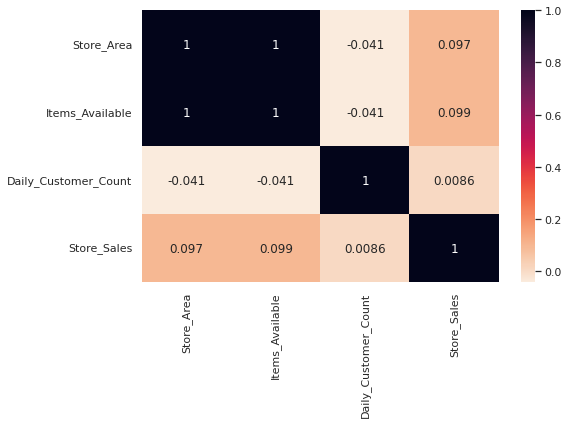

In [74]:
# Let's see the correlation between variables
plt.figure(figsize = (8, 5))
sns.heatmap(df.corr(), annot = True, cmap = 'rocket_r')


**We can notice from above heatmap:**

Store area and items available has a linear relationship

Store area and items available has more impact on store sales rather than daily customers

In [83]:
#Find the interesting store area range
df['Store_Area_Range'] = pd.qcut(df['Store_Area'],10)
df

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,avg_purchase,Store_Area_Range
0,1659.0,1961.0,530.0,66490,125.452830,"(1613.9, 1701.6]"
1,1461.0,1752.0,210.0,39820,189.619048,"(1429.8, 1477.0]"
2,1340.0,1609.0,720.0,54010,75.013889,"(1257.8, 1360.1]"
3,1451.0,1748.0,620.0,53730,86.661290,"(1429.8, 1477.0]"
4,1770.0,2111.0,450.0,46620,103.600000,"(1701.6, 1819.9]"
...,...,...,...,...,...,...
883,1582.0,1910.0,1080.0,66390,61.472222,"(1539.0, 1613.9]"
884,1387.0,1663.0,850.0,82080,96.564706,"(1360.1, 1429.8]"
885,1200.0,1436.0,1060.0,76440,72.113208,"(1167.0, 1257.8]"
886,1299.0,1560.0,770.0,96610,125.467532,"(1257.8, 1360.1]"


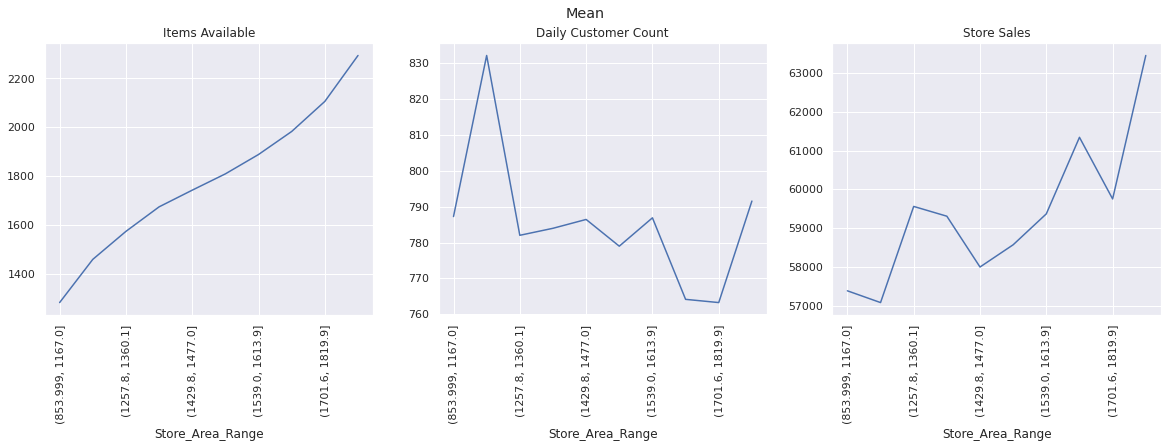

In [86]:
#Viualization the Store Area Range
fig, axs = plt.subplots(1,3, figsize=(20,5))
plt.suptitle('Mean')
df.groupby('Store_Area_Range')['Items_Available'].mean().plot(rot=90, ax=axs[0], title='Items Available')
df.groupby('Store_Area_Range')['Daily_Customer_Count'].mean().plot(rot=90, ax = axs[1], title='Daily Customer Count')
df.groupby('Store_Area_Range')['Store_Sales'].mean().plot(rot=90, ax=axs[2], title='Store Sales')
plt.show()

The bigger the store, the more items avaiable for sales

Store Area is not a variable to determines how many or few customer to come

Store Area infulence customers to buy more (maybe it because stores have more 
kind of items or the bigger store sells their items more expensive)

Store Area Range (1165, 1252) become the store with the lowest  purchase

Store Area Range (1252, 1359) has 69650 customers but that store has the highest avg_purchase

My Opinion for Store Area Range (1165, 1252), why this store became the highest avg daily customer but lowest in store sales.
They only sell cheap items, that's why many customers come but the income is low
Customers can not find the item they are looking for in this store


**Suggestions to build your own store:**

Build the store in Store Area Range (1252, 1359), if we look at the data, Store Area in that range has the highest avg_purchase although there are not many daily customers.

